## Projeto 2 - Ciência dos Dados

In [52]:
# Importando as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import tree, datasets
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [2]:
# Lendo o banco de dados
data_0 = pd.read_csv("data.csv")

In [3]:
# Rodando as primeiras 5 linhas do banco de dados
data_0.head()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


In [35]:
# Filtrando as colunas
data = data_0.loc[:,["tempo", "target","speechiness", "loudness", "energy", "instrumentalness", "duration_ms", "danceability", "acousticness"]]

In [36]:
# Rodando as primeiras linhas depois de filtrar
data.head()

,tempo,target,speechiness,loudness,energy,instrumentalness,duration_ms,danceability,acousticness
0,150.062,1,0.4310,-8.795,0.434,0.021900,204600,0.833,0.0102
1,160.083,1,0.0794,-10.401,0.359,0.006110,326933,0.743,0.1990
2,75.044,1,0.2890,-7.148,0.412,0.000234,185707,0.838,0.0344
3,86.468,1,0.0261,-15.236,0.338,0.510000,199413,0.494,0.6040
4,174.004,1,0.0694,-11.648,0.561,0.512000,392893,0.678,0.1800


In [38]:
data_hit = data.loc[data['target']==1]
data_hit

,tempo,target,speechiness,loudness,energy,instrumentalness,duration_ms,danceability,acousticness
0,150.062,1,0.4310,-8.795,0.434,0.021900,204600,0.833,0.0102
1,160.083,1,0.0794,-10.401,0.359,0.006110,326933,0.743,0.1990
2,75.044,1,0.2890,-7.148,0.412,0.000234,185707,0.838,0.0344
3,86.468,1,0.0261,-15.236,0.338,0.510000,199413,0.494,0.6040
4,174.004,1,0.0694,-11.648,0.561,0.512000,392893,0.678,0.1800
...,...,...,...,...,...,...,...,...,...
1015,139.997,1,0.2950,-1.894,0.937,0.000000,181114,0.812,0.2580
1016,86.733,1,0.2520,-6.354,0.822,0.000004,143214,0.745,0.0103
1017,140.008,1,0.2170,-5.311,0.922,0.000000,213251,0.673,0.3290
1018,147.072,1,0.2710,-6.433,0.801,0.000000,187400,0.794,0.3500


In [39]:
data_flop = data.loc[data['target']==0]
data_flop

,tempo,target,speechiness,loudness,energy,instrumentalness,duration_ms,danceability,acousticness
1020,143.919,0,0.0267,-11.478,0.196,0.000036,227222,0.640,0.819000
1021,92.003,0,0.0431,-5.703,0.628,0.000002,180252,0.587,0.067700
1022,88.541,0,0.0432,-5.713,0.716,0.000000,187813,0.631,0.013000
1023,88.965,0,0.0376,-5.292,0.809,0.000000,194413,0.589,0.231000
1024,104.986,0,0.0353,-3.795,0.841,0.000000,227373,0.612,0.000907
...,...,...,...,...,...,...,...,...,...
2012,74.976,0,0.3330,-3.501,0.932,0.002690,274404,0.584,0.001060
2013,110.041,0,0.1310,-2.663,0.892,0.001670,182182,0.894,0.087700
2014,150.082,0,0.1070,-2.467,0.935,0.003990,207200,0.637,0.008570
2015,150.011,0,0.1330,-2.735,0.992,0.677000,185600,0.557,0.001640


# Análise exploratória inicial

### Correlação entre as categorias das músicas

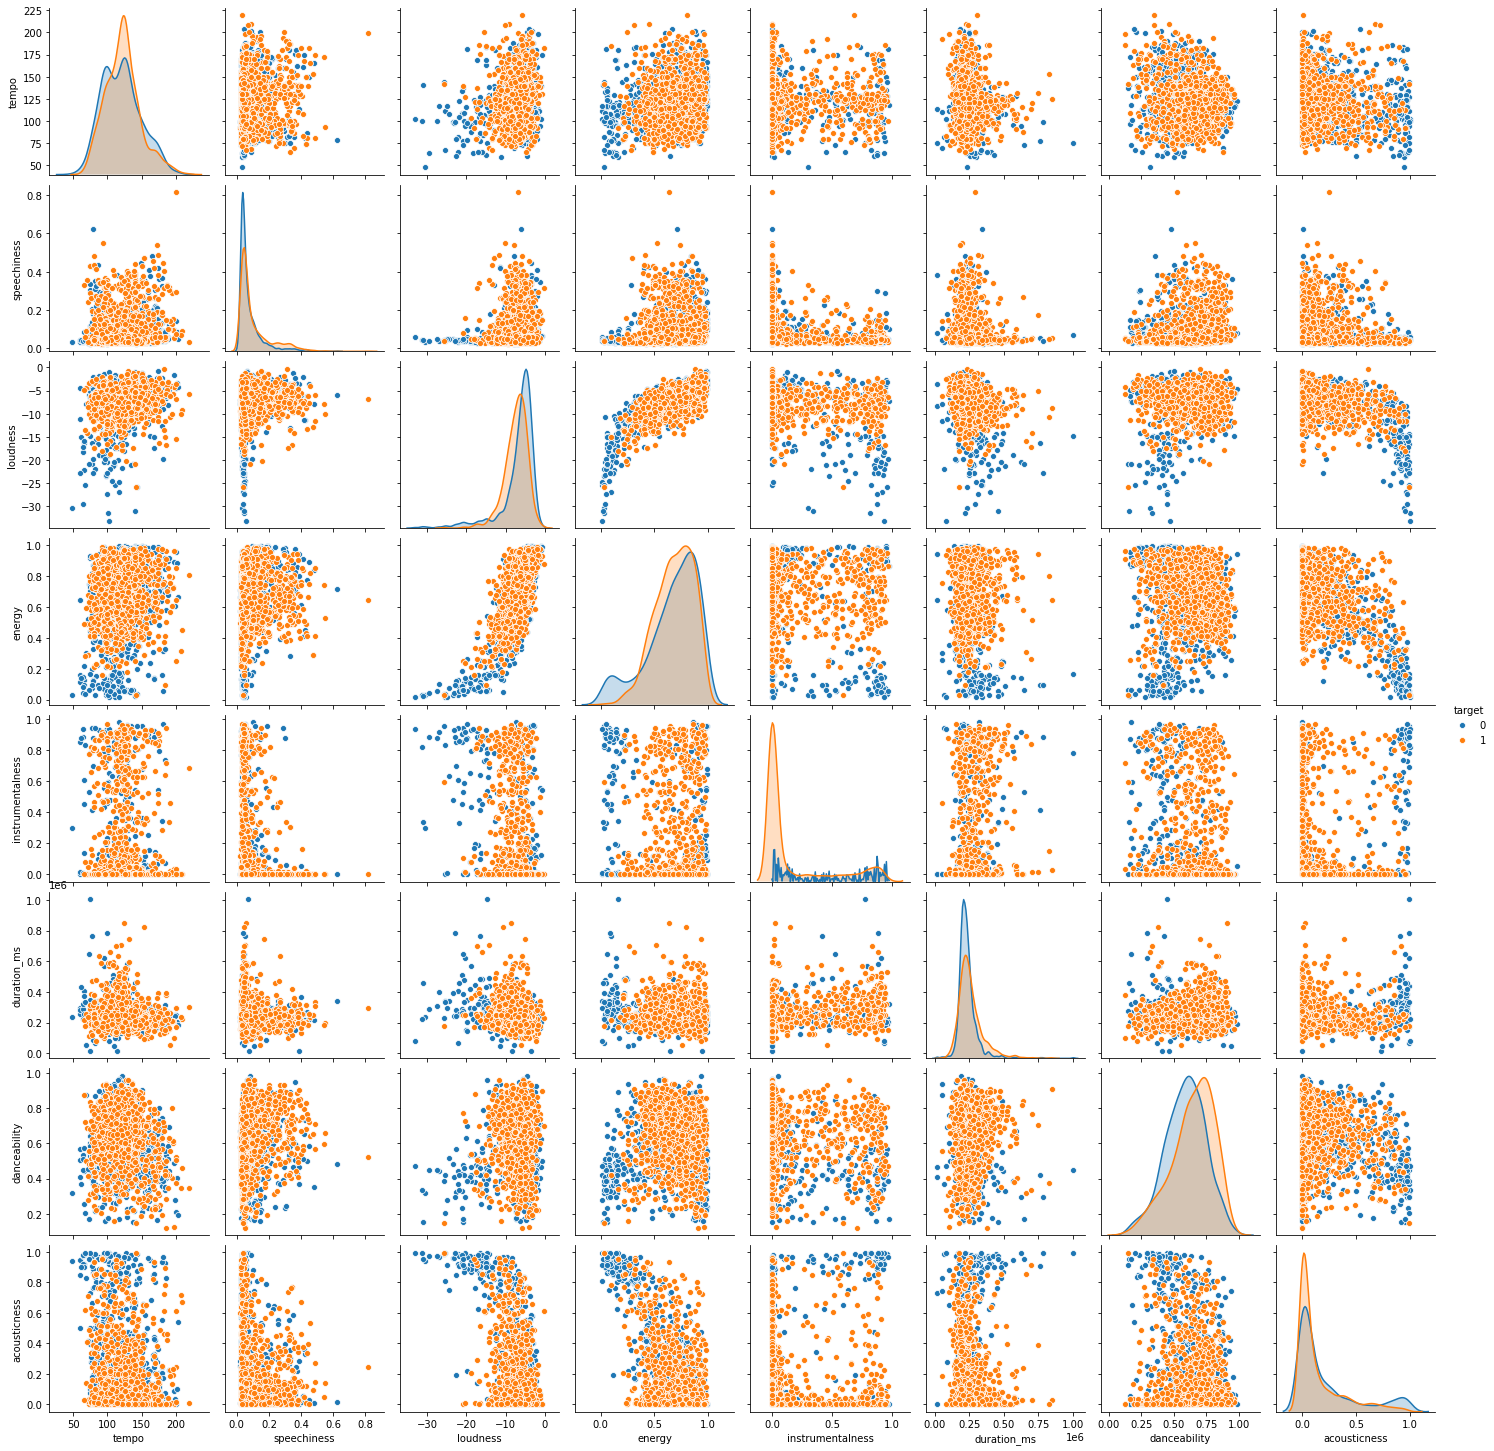

In [33]:
sns.pairplot(data, hue="target")

# Modelo 1 - Árvore de decisão

In [53]:
features = ['tempo','speechiness', 'loudness', 'energy', 'instrumentalness','duration_ms','danceability','acousticness']
X = data[features] 
Y = data.target
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5, random_state=1)

In [54]:
X_train

,tempo,speechiness,loudness,energy,instrumentalness,duration_ms,danceability,acousticness
103,129.948,0.1050,-5.332,0.7930,0.000000,236760,0.698,0.123000
9,99.994,0.2370,-7.792,0.6030,0.000000,226840,0.836,0.002080
1338,102.035,0.0781,-3.287,0.9210,0.753000,194000,0.401,0.000033
543,133.948,0.0504,-5.780,0.8970,0.007480,210160,0.638,0.037200
1601,133.959,0.0439,-21.189,0.0632,0.452000,260000,0.236,0.983000
...,...,...,...,...,...,...,...,...
1791,129.623,0.0392,-8.335,0.2710,0.000000,246896,0.470,0.962000
1096,175.907,0.0508,-9.210,0.4820,0.000194,193118,0.735,0.205000
1932,161.109,0.4100,-2.027,0.9110,0.000000,254027,0.514,0.055900
235,102.960,0.0386,-3.886,0.5780,0.006720,280427,0.757,0.011000


In [55]:
X_test

,tempo,speechiness,loudness,energy,instrumentalness,duration_ms,danceability,acousticness
351,145.306,0.0478,-5.437,0.858,0.000000,231765,0.612,0.012400
1471,97.900,0.0540,-3.794,0.737,0.000017,174031,0.546,0.050900
1658,124.994,0.0335,-5.449,0.923,0.000228,157452,0.624,0.026800
703,126.976,0.0461,-4.981,0.888,0.055100,299383,0.626,0.001520
1418,117.264,0.1850,-3.755,0.783,0.000000,291280,0.523,0.214000
...,...,...,...,...,...,...,...,...
1605,126.112,0.1560,-6.329,0.862,0.171000,184762,0.514,0.031900
1104,177.912,0.0930,-5.119,0.731,0.000000,221027,0.685,0.204000
1976,187.961,0.0489,-3.541,0.900,0.000019,190787,0.446,0.000102
1924,140.123,0.0734,-4.647,0.931,0.000071,270427,0.600,0.029600


In [56]:
Y_train

103     1
9       1
1338    0
543     1
1601    0
       ..
1791    0
1096    0
1932    0
235     1
1061    0
Name: target, Length: 1008, dtype: int64

In [57]:
Y_test

351     1
1471    0
1658    0
703     1
1418    0
       ..
1605    0
1104    0
1976    0
1924    0
134     1
Name: target, Length: 1009, dtype: int64

In [76]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,Y_train)
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))

Accuracy: 0.6878097125867195


In [75]:
clf = DecisionTreeClassifier(criterion="entropy",max_depth=5)
clf = clf.fit(X_train,Y_train)
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))

Accuracy: 0.7215064420218038
